## Промежуточный проект 
### Вариант 1: e-commerce 

In [17]:
#Импортируем необходимые библиотеки

import pandas as pd
import seaborn as sns
import numpy as np
from operator import attrgetter

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [18]:
#Считаем таблицу с данными о пользователях 

customers_df = pd.read_csv('/Users/maria/Documents/GitHub/first_project/olist_customers_dataset.csv')

In [19]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


customer_id — позаказный идентификатор пользователя

customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя



In [20]:
customers_df.customer_id.nunique()

99441

In [21]:
customers_df.customer_unique_id.nunique()

96096

Количество уникальных значений cutomer_id больше, чем уникальных значений customer_unique_id. Это может означать, что одному и тому же пользователю присвается разный customer_id каждый раз при совершении покупки. 

In [27]:
#Считаем таблицу с данными о заказах

orders_df = pd.read_csv('/Users/maria/Documents/GitHub/first_project/olist_orders_dataset.csv')

In [28]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки



In [29]:
#Считаем таблицу с данными о товарных позициях 

items_df = pd.read_csv('/Users/maria/Documents/GitHub/first_project/olist_order_items_dataset.csv')

In [30]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара



### 1. Сколько у нас пользователей, которые совершили покупку только один раз? 

Для целей выполнения данного проекта покупкой будет считаться заказ, имеющий статус "delivered" и имеющий дату доставки в столбце order_delivered_customer_date. 

Для ответа на вопрос объединим датафреймы oredres_df и customers_df по customer_id. 

In [31]:
orders_merged = orders_df.merge(customers_df, on = "customer_id", how = "inner")

In [32]:
orders_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [33]:
#посчитаем уникальных пользователей с одной покупкой 

single_order = orders_merged[(orders_merged.order_status == 'delivered')&(orders_merged.order_delivered_customer_date.notnull())]\
             .groupby('customer_unique_id', as_index=False)\
             .agg({'order_id':'nunique'})\
             .query('order_id == 1').count().order_id
single_order

90549

Итого: 90549 пользователей совершили только одну покупку. 

In [34]:
#Посчитаем процент от общего числа покупателей. 
round((single_order/orders_merged.customer_unique_id.nunique()*100),2)

94.23

Более 94% наших пользователей совершили покупку всего один раз. Необходимо обратить на это внимание и разработать возможные способы удержания клиентов.  

### 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

В качестве недоставленных товаров рассмотрим те товары, которые имеют статус, отличный от 'delivered'. 
Но для начала убедимся, что все заказы со статусом delivered также имеют order_delivered_customer_date. 

In [35]:
orders_merged.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
customer_unique_id               object
customer_zip_code_prefix          int64
customer_city                    object
customer_state                   object
dtype: object

In [36]:
#Приведем данные к нужному формату

orders_merged['order_purchase_timestamp']= pd.to_datetime(orders_merged['order_purchase_timestamp'])
orders_merged['order_approved_at']= pd.to_datetime(orders_merged['order_approved_at'])
orders_merged['order_delivered_carrier_date']= pd.to_datetime(orders_merged['order_delivered_carrier_date'])
orders_merged['order_delivered_customer_date']= pd.to_datetime(orders_merged['order_delivered_customer_date'])
orders_merged['order_estimated_delivery_date']= pd.to_datetime(orders_merged['order_estimated_delivery_date'])

In [37]:
orders_merged.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [38]:
#Посмотрим, есть ли заказы, которые имеют статус delivered, но не имеют даты доставки, и если да, то сколько таких случаев

orders_merged[(orders_merged.order_status == 'delivered')&(orders_merged.order_delivered_customer_date.isna())].count()


order_id                         8
customer_id                      8
order_status                     8
order_purchase_timestamp         8
order_approved_at                8
order_delivered_carrier_date     7
order_delivered_customer_date    0
order_estimated_delivery_date    8
customer_unique_id               8
customer_zip_code_prefix         8
customer_city                    8
customer_state                   8
dtype: int64

Из получившихся данных видно, что 8 заказов, имеющих статус delivered, не имеют даты доставки в столбце order_delivered_customer_date, а один заказ, имеющий статус delivered, и вовсе не был передан курьеру (order_delivered_carrier_date).

In [39]:
#Отфильтруем заказы, не имеющие даты доставки, и посмотрим, какие статусы вообще есть в датасете

not_delivered_orders = orders_merged[orders_merged.order_delivered_customer_date.isna()]

In [40]:
#Выведем все существующие статусы заказов
not_delivered_orders.order_status.value_counts()

shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: order_status, dtype: int64

In [41]:
#проверим заказы со статусом processing
orders_merged[orders_merged.order_status == 'processing']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,9f269af9c49244f6ba4a46985a3cfc2e,3436,sao paulo,SP
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,07d5b1f9bdd053347f0213187b343ac9,3531,sao paulo,SP
741,6a6c7d523fd59eb5bbefc007331af717,d954782ec6c0e911292c8a80757ef28d,processing,2017-11-24 20:09:33,2017-11-24 23:15:15,NaT,NaT,2017-12-20,2adaff8e437d7153f3326cf14187d821,6519,santana de parnaiba,SP
1192,745e1d4a7f8c4b548881788d4113bb1d,7198d7088442e4ddfe553353d8ddc957,processing,2017-11-17 06:34:36,2017-11-18 02:15:40,NaT,NaT,2017-12-12,11160ccb67a77abe36dd062bd2701a04,12230,sao jose dos campos,SP
1516,1d52ba7197c7acebbb4f826f6585536f,c9c7fe860d602373a9e93f8bfe9d877a,processing,2017-02-13 18:32:55,2017-02-13 18:43:55,NaT,NaT,2017-04-04,fd0c94860d35a337f8954558e9e0181c,24210,niteroi,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...
97400,dcdfc540e42725663242bb884c28f0a6,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaT,NaT,2017-11-23,5675ed0d10724c31f70cb0a3bca7c1ed,14401,franca,SP
97666,e471815e7114cdb474064f7dbb1a8b67,092c9316ae71b2fe43e526043f351967,processing,2017-12-20 11:00:02,2017-12-20 11:10:43,NaT,NaT,2018-02-02,92b48641632e617da2beb5e94004bfce,51130,recife,PE
98089,10951d02d64917a34959abeb8130601e,3e6754e591ff3568ccc5bf69a649918c,processing,2018-02-13 21:02:02,2018-02-15 04:11:21,NaT,NaT,2018-03-13,4b6590937ab57d114e9a1827da91c88f,45823,eunapolis,BA
99140,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26 21:56:13,2017-12-26 22:05:26,NaT,NaT,2018-01-26,43fb4e33ebe4ac765e99c7b57e5d6940,79200,aquidauana,MS


Исходя из данных, можем предположить, что с момента размещения заказа товар проходит несколько стадий: 

1) shipped - отправлен 
2) canceled - отменен 
3) unavailable - недоступен (возможно, нет в наличии) 
4) invoiced - выставлен счет 
5) processing - вероятнее всего, системный сбой или обработка платежа. Мы видим, что заказ подтвержден, но не выдан курьеру. 
6) delivered - доставлен. Хотя в данном случае дата доставки пропущена. 
7) created - создан 
8) approved - подтвержден

Из всех статусов в число недоставленных, на мой взгляд, можно включить не все. По логике работы интернет-магазинов, статусы created, approved, invoiced и shipped должны изменяться в ходе продвижения по логистической цепочке и в конечном итоге перейти в статус delivered. Но для того, чтобы быть уверенными, что мы можем не включать их в число недоставленных, посмотрим, какая для них была указана ожидаемая дата доставки и наступила ли эта дата. 

In [42]:
not_delivered_orders['order_purchase_by_month']= pd.to_datetime(orders_merged['order_purchase_timestamp']).dt.month
not_delivered_orders['order_estimated_delivery_by_month']= pd.to_datetime(orders_merged['order_estimated_delivery_date']).dt.month

In [43]:
#Проверим последнюю дату заказа, чтобы приблизительно понять максимальную дату, за которую у нас имеются данные

orders_merged.order_purchase_timestamp.max()

Timestamp('2018-10-17 17:30:18')

In [44]:
#Сравним данные ожидаемой даты доставки с полученной выше датой 

not_delivered_orders.query("order_estimated_delivery_date < '2018-10-17'")\
                    .groupby('order_status', as_index = False)\
                    .agg({'order_id':'count'})\
                    .sort_values(by='order_id', ascending = False)

,order_status,order_id
6,shipped,1107
1,canceled,614
7,unavailable,609
4,invoiced,314
5,processing,301
3,delivered,8
2,created,5
0,approved,2


Видим, что количество недоставленных заказов с интересующими нас статусами (created, approved, invoiced и shipped) не изменилось. Это означает, что заказы не были доставлены в срок, а значит, вряд ли поменяют свой статус, как предполагалось ранее. 
Следовательно, мы можем отнести данные заказы к категории недоставленных, наряду с отмененными (canceled) и недоступными (unavailable), а также наряду с теми, которые имеют статус delivered, но не имеют даты доставки. 

Посчитаем с учетом этого среднее количество недоставленных товаров в месяц. 

In [45]:
not_delivered_per_month = not_delivered_orders.groupby(['order_estimated_delivery_by_month','order_status'], as_index=False)\
                    .agg({'order_id':'count'})\
                    .sort_values(by='order_estimated_delivery_by_month')
                    

In [46]:
not_delivered_per_month.head(6)

,order_estimated_delivery_by_month,order_status,order_id
0,1,canceled,7
1,1,created,2
2,1,invoiced,10
3,1,processing,28
4,1,shipped,51
5,1,unavailable,44


In [47]:
#Посмотрим, сколько в среднем заказов не доставляется, сгруппировав по причинам

not_delivered_per_month.pivot_table(index = 'order_status', values = 'order_id', aggfunc = 'mean')

,order_id
order_status,
approved,1.000000
canceled,51.583333
created,1.666667
delivered,2.666667
invoiced,26.166667
processing,25.083333
shipped,92.250000
unavailable,50.750000


In [48]:
#Среднее количество недоставленных заказов в месяц всего: 

not_delivered_per_month.order_id.mean().round(1)

43.6

Видим, что достаточно большое количество заказов не доставляется по причине недоступности товара. Причем предполагаю, что товар числится на сайте магазина и отмена происходит уже в процессе оформления заказа. Это говорит о том, что необходимо наладить работу сайта и, как минимум, не выставлять на полки недоступные к заказу товары.

Также очень большое количество заказов висит в статусе shipped (отправлены), но сроки ожидаемой доставки уже давно прошли. Учитывая, что заказ не отменен, тут может быть два варианта: 
1. Заказ на самом деле отменет, но есть внутренний сбой в админке компании, из-за которого не меняются статусы. В этом случае можно предположить, что товар был утерян по дороге. 
2. Товар застрял где-то на границе, если осуществляется международная перевозка. 

Много отмененных заказов. Примем отмененных как покупателями, так и продавцами. Вероятная причина - утеря товара со стороны продавка или слишком долгое ожидание доставки со стороны покупателя. 

Дальшейшего изучения требует также статус processing. На данном этапе у нас недостаточно данных для этого, но необходимо изучить, что означает этот статс - снутренний сбой при оформлении заказа или обработка платежа/заказа, или что-то иное. 

Учитывая временной отрезок, за которые у нас есть данные, предположу, что компания работает недавно и не все процессы доставки налажены. Это все гипотезы, для подтверждения которых необходим дальнейший анализ. 

### 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [49]:
#Для начала объединим датафреймы для получение полной информации о заказах

final_df = orders_merged.merge(items_df, on = 'order_id', how = 'left')


In [50]:
final_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_item_id                           float64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
dtype: object

In [51]:
#Приведем дату покупки к формату дня недели 

final_df['weekdays'] = final_df.order_purchase_timestamp.dt.day_name()

Выше было обозначено, что в данном проекте покупкой будут считать только те заказы, которые имеют статус delivered и имеющий дату доставки до покупателя. Отфильтруем данные, исходя из этого. 

In [52]:
final_purchase_df = final_df[(final_df.order_status == 'delivered')&(final_df.order_delivered_customer_date.notnull())]

In [53]:
#Сгруппируем данные по дням недели

top_sellers = final_purchase_df.groupby(['weekdays', 'product_id'], as_index = False)\
                               .agg({'order_id':'count'}) \
                               .drop_duplicates(subset=["product_id"], keep='first')\
                               .sort_values(['order_id', 'product_id'], ascending = False)\
                               .rename(columns={'order_id': 'amount'})
                              

In [54]:
top_sellers.groupby('product_id', as_index = False).agg({'amount':'max'}).sort_values(['product_id'],ascending=False)

,product_id,amount
32213,fffe9eeff12fcbd74a2f2b007dde0c58,1
32212,fffdb2d0ec8d6a61f0a0a0db3f25b441,1
32211,fff9553ac224cec9d15d49f5a263411f,1
32210,fff81cc3158d2725c0655ab9ba0f712c,1
32209,fff6177642830a9a94a0f2cba5e476d1,1
...,...,...
4,000d9be29b5207b54e86aa1b1ac54872,1
3,000b8f95fcb9e0096488278317764d19,1
2,0009406fd7479715e4bef61dd91f2462,1
1,00088930e925c41fd95ebfe695fd2655,1


In [55]:
top_sellers.head()

,weekdays,product_id,amount
5789,Friday,aca2eb7d00ea1a7b8ebd4e68314663af,83
2248,Friday,422879e10f46682990de24d770e7f83d,77
5146,Friday,99a4788cb24856965c36a24e339b6058,74
1858,Friday,368c6c730842d78016ad823897a372db,67
2840,Friday,53759a2ecddad2bb87a079a1f1519f73,58


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 

In [56]:
#Рассчитаем количество недель в каждом месяце

final_purchase_df['weeks'] = final_purchase_df.order_purchase_timestamp.dt.days_in_month / 7
final_purchase_df['purchase_month'] = final_purchase_df.order_purchase_timestamp.dt.to_period('M') 

In [57]:
avg_order = final_purchase_df.groupby(['customer_unique_id','purchase_month','weeks'], as_index=False)\
                             .agg({'order_id':'nunique'})

In [58]:
avg_order

,customer_unique_id,purchase_month,weeks,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,1
...,...,...,...,...
95181,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,1
95182,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,1
95183,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,1
95184,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,1


In [59]:
#Разделим среднее количество покупок в месяц на количество недель в месяце

avg_order.order_id = avg_order.order_id / avg_order.weeks

Среднее количество заказов в неделю у каждого из пользователей:

In [60]:
avg_order

,customer_unique_id,purchase_month,weeks,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,4.285714,0.233333
...,...,...,...,...
95181,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,4.285714,0.233333
95182,fffea47cd6d3cc0a88bd621562a9d061,2017-12,4.428571,0.225806
95183,ffff371b4d645b6ecea244b27531430a,2017-02,4.000000,0.250000
95184,ffff5962728ec6157033ef9805bacc48,2018-05,4.428571,0.225806


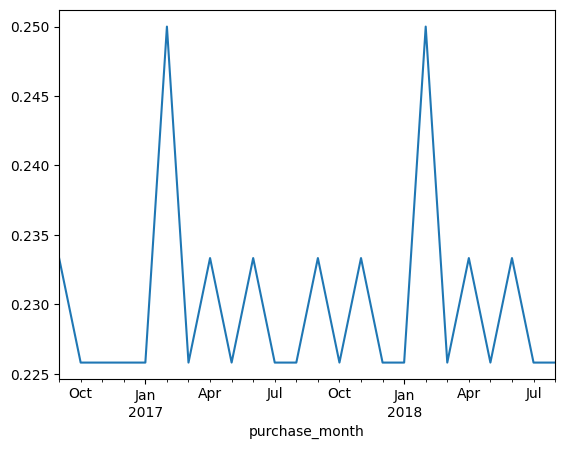

In [61]:
#Среднее количество покупок на одного пользователя по месяцам

avg_order.groupby('purchase_month')['order_id'].median().plot();

Так как среднее по средним считать нельзя, то я посчитала медиану частотности заказов помесячно и построила базовый график для лучшей визуализации.  

Из графика можем увидеть сильные повышения частотности по февралям и менее сильные по месяцам, в которых 30 дней.

### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.


Деление на когорты будем производить по дате первого заказа. 

In [62]:
#Для начала подготовим датафрейм и оставим в нем только нужные столбцы

cohort_df = final_purchase_df.groupby(['customer_unique_id','purchase_month'], as_index = False )\
                            .agg({'order_id':'count'})\
                            .sort_values(by = 'purchase_month')\
                            .rename(columns = {'order_id': 'purchase amount'})

In [63]:
cohort_df.dtypes

customer_unique_id       object
purchase_month        period[M]
purchase amount           int64
dtype: object

In [64]:
cohort_df.purchase_month.min()

Period('2016-09', 'M')

In [65]:
cohort_df.purchase_month.max()

Period('2018-08', 'M')

In [66]:
cohort_df

,customer_unique_id,purchase_month,purchase amount
48809,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,3
34751,5d2db05a565eda438cf5069b7be6b1bb,2016-10,1
20673,37751f6b47c9a1dc55fffde08f0183fc,2016-10,1
46159,7bf845014243c08bdcea071d6981303e,2016-10,2
95005,ff822e5e1322cef6c211ad8a0591999e,2016-10,1
...,...,...,...
23832,3fee181a16778a8dec8eaf2470c6cd3f,2018-08,1
23822,3fe678665ed174230c56f10c156b20db,2018-08,1
39897,6b18bd1ac98f8f5265594f0cfcbcb30f,2018-08,1
11867,1fb77d999ea30d0ad0e9f684088d2873,2018-08,1


In [67]:
#Добавим датафрейм с датой первого заказа для каждого отдельного пользователя

first_purchase = cohort_df.groupby('customer_unique_id', as_index = False)\
                           .agg({'purchase_month':'min'})\
                           .rename(columns = {'purchase_month': 'first_purchase'})

In [68]:
first_purchase

,customer_unique_id,first_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05
2,0000f46a3911fa3c0805444483337064,2017-03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10
4,0004aac84e0df4da2b147fca70cf8255,2017-11
...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06
93346,fffea47cd6d3cc0a88bd621562a9d061,2017-12
93347,ffff371b4d645b6ecea244b27531430a,2017-02
93348,ffff5962728ec6157033ef9805bacc48,2018-05


In [69]:
#Объединим оба датафрейма

cohort_df = cohort_df.merge(first_purchase, how = 'inner', on = 'customer_unique_id')

In [70]:
cohort_df

,customer_unique_id,purchase_month,purchase amount,first_purchase
0,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,3,2016-09
1,5d2db05a565eda438cf5069b7be6b1bb,2016-10,1,2016-10
2,37751f6b47c9a1dc55fffde08f0183fc,2016-10,1,2016-10
3,7bf845014243c08bdcea071d6981303e,2016-10,2,2016-10
4,ff822e5e1322cef6c211ad8a0591999e,2016-10,1,2016-10
...,...,...,...,...
95181,c5cd8249a8a891697b1b8b1a73f344e6,2018-08,1,2018-08
95182,3fee181a16778a8dec8eaf2470c6cd3f,2018-08,1,2018-08
95183,3fe678665ed174230c56f10c156b20db,2018-08,1,2018-08
95184,6b18bd1ac98f8f5265594f0cfcbcb30f,2018-08,1,2018-08


In [71]:
cohort_df.loc[cohort_df['customer_unique_id'] == '830d5b7aaa3b6f1e9ad63703bec97d23']

,customer_unique_id,purchase_month,purchase amount,first_purchase
0,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,3,2016-09


In [72]:
#Сгруппируем пользователей по дате первой и "последней" покупки 
cohort_df = cohort_df.groupby(['first_purchase','purchase_month'], as_index=False) \
                     .agg({'customer_unique_id':'count'})

In [73]:
cohort_df

,first_purchase,purchase_month,customer_unique_id
0,2016-09,2016-09,1
1,2016-10,2016-10,262
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
214,2018-06,2018-07,25
215,2018-06,2018-08,16
216,2018-07,2018-07,5946
217,2018-07,2018-08,31


In [74]:
#Разобьем пользователей на когорты, вычислив разницу между месяцем покупки и первым месяцем покупки 

cohort_df['cohort'] = (cohort_df.purchase_month - cohort_df.first_purchase)\
                       .apply(attrgetter('n'))

In [75]:
cohort_df

,first_purchase,purchase_month,customer_unique_id,cohort
0,2016-09,2016-09,1,0
1,2016-10,2016-10,262,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
...,...,...,...,...
214,2018-06,2018-07,25,1
215,2018-06,2018-08,16,2
216,2018-07,2018-07,5946,0
217,2018-07,2018-08,31,1


In [76]:
cohort_df_pivot = cohort_df.pivot_table(index='first_purchase', columns='cohort', values='customer_unique_id')


In [77]:
cohort_df_pivot

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0,NaN,NaN
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3450.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN


In [78]:
#Посчитаем retention rate - какое количество пользователей из нашей когорты сделало покупку в интересующий нас период. 

retention = cohort_df_pivot.divide(cohort_df_pivot.iloc[:, 0], axis=0)
retention

cohort,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
first_purchase,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.007634
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,NaN,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395,NaN
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199,NaN,NaN
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330,NaN,NaN,NaN
2017-05,1.0,0.004638,0.004638,0.002899,0.002899,0.003188,0.004058,0.001449,0.002609,0.002609,0.002609,0.003478,0.002319,0.000290,0.001739,0.002029,NaN,NaN,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN,NaN,NaN


In [79]:
retention[3].max().round(4)

0.0043

Максимальный retention rate на третий месяц после совершения первого заказа среди пользователей, совершивших покупку, приходится на 2017-06 и составляет примерно 0.43%

Визуализируем для наглядности. 

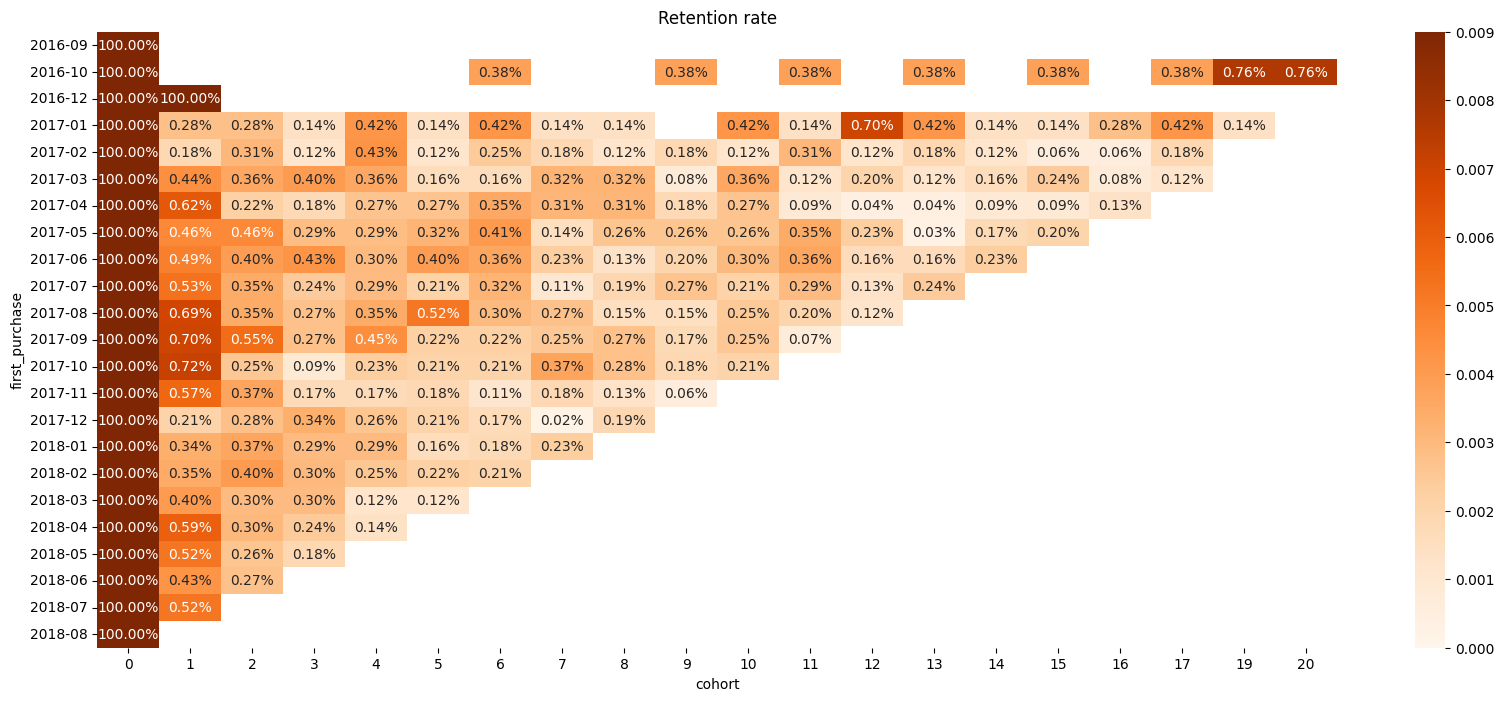

In [80]:
plt.figure(figsize=(20,8))
plt.title('Retention rate')
sns.heatmap(data = retention, annot=True, cmap='Oranges', mask=retention.isnull(), vmin=0.0,vmax=0.009, fmt='.2%');

### 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

Для сегментации создадим следующие метрики:
R (recency) - время от последней покупки пользователя до текущей даты, F (frequency) - суммарное количество покупок у пользователя за всё время, M (monetary) - сумма покупок за всё время.

Так как мы определились считать покупкой заказы со статусом delivered и наличием даты доставки, будем использовать отфильтрованный ранее по этому критерию датафрейм final_purchase_df, но оставим в нем только необходимые столбцы. 

In [81]:
final_purchase_rfm = final_purchase_df[['customer_unique_id','order_id','order_purchase_timestamp','price']]

In [82]:
final_purchase_rfm.dtypes

customer_unique_id                  object
order_id                            object
order_purchase_timestamp    datetime64[ns]
price                              float64
dtype: object

Посчитаем метрику Recency, для этого найдем разницу во времени между последней покупкой пользователя и последней датой заказа (так как имеются не все данные) 

In [83]:
last_purchase = final_purchase_rfm\
                .groupby(['customer_unique_id'], as_index = False)\
                .agg({'order_purchase_timestamp':'max'})

In [84]:
last_purchase['recency'] = ((last_purchase.order_purchase_timestamp.max()-last_purchase.order_purchase_timestamp) / np.timedelta64(1, 'D')).astype(int)

In [85]:
last_purchase.recency.describe()

count    93350.000000
mean       236.950070
std        152.589932
min          0.000000
25%        113.000000
50%        218.000000
75%        345.000000
max        713.000000
Name: recency, dtype: float64

<AxesSubplot: >

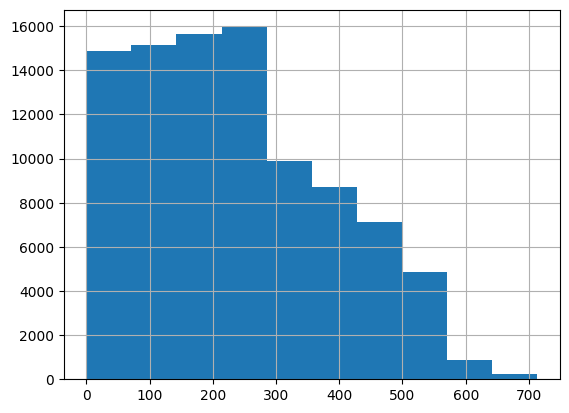

In [86]:
last_purchase.recency.hist()

Расчитаем метрику Frequency - частоту заказов на каждого пользователя за указанный период. 

In [87]:
frequency = final_purchase_rfm\
            .groupby(['customer_unique_id'], as_index = False)\
            .agg({'order_id':'nunique'})\
            .rename(columns = {'order_id':'frequency'})

In [88]:
frequency.frequency.describe()

count    93350.000000
mean         1.033423
std          0.209106
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.000000
Name: frequency, dtype: float64

Расчитаем метрику Monetary - сумму покупок каждого клиента за все время.

In [89]:
monetary = final_purchase_rfm\
            .groupby(['customer_unique_id'], as_index = False)\
            .agg({'price':'sum'})\
            .rename(columns = {'price':'monetary'})

In [90]:
#Объединим полученные метрики в один датафрейм 

rfm = last_purchase.merge(frequency, how = 'inner', on = 'customer_unique_id').merge(monetary, how = 'inner', on = 'customer_unique_id')

In [91]:
rfm = rfm.drop(columns = ['order_purchase_timestamp'])

In [92]:
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90
2,0000f46a3911fa3c0805444483337064,536,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00
...,...,...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00
93346,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89
93347,ffff371b4d645b6ecea244b27531430a,567,1,89.90
93348,ffff5962728ec6157033ef9805bacc48,118,1,115.00


Проведем сегментацию recency на основании квантилей и присвоим пользователям соответствующие ранги: 1 - пользователи, сделавшие заказ очень давно, 4 - сделавшие заказ недавно. 

In [93]:
quantile_recency = rfm.recency.quantile(q=[0.25,0.5,0.75]).round(-1)
quantile_recency

0.25    110.0
0.50    220.0
0.75    340.0
Name: recency, dtype: float64

In [94]:
def recency_score(x):
    if x <= quantile_recency[0.25]:
        return 4
    elif x <= quantile_recency[0.5]:
        return 3
    elif x <= quantile_recency[0.75]:
        return 2
    else:
        return 1

rfm['recency_score'] = rfm.recency.apply(lambda x: recency_score(x)) 

Теперь внимательнее рассмотрим частоту заказов (frequency). В данном случае деление на сегменты по квантилям будет нецелесообразно, так как большая часть клиентов сделала не более одного заказа. 

In [95]:
rfm.query('frequency == 1')

,customer_unique_id,recency,frequency,monetary,recency_score
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,129.90,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,18.90,3
2,0000f46a3911fa3c0805444483337064,536,1,69.00,1
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,25.99,2
4,0004aac84e0df4da2b147fca70cf8255,287,1,180.00,2
...,...,...,...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,446,1,1570.00,1
93346,fffea47cd6d3cc0a88bd621562a9d061,261,1,64.89,2
93347,ffff371b4d645b6ecea244b27531430a,567,1,89.90,1
93348,ffff5962728ec6157033ef9805bacc48,118,1,115.00,3


In [96]:
rfm.query('frequency == 2')

,customer_unique_id,recency,frequency,monetary,recency_score
104,004288347e5e88a27ded2bb23747066c,227,2,317.89,2
243,00a39521eb40f7012db50455bf083460,87,2,81.45,4
305,00cc12a6d8b578b8ebd21ea4e2ae8b27,525,2,99.80,1
404,011575986092c30523ecb71ff10cb473,132,2,182.90,3
419,011b4adcd54683b480c4d841250a987f,195,2,183.43,3
...,...,...,...,...,...
92915,fed519569d16e690df6f89cb99d4e682,163,2,249.90,3
92983,ff03923ad1eb9e32304deb7f9b2a45c9,95,2,220.64,4
93077,ff44401d0d8f5b9c54a47374eb48c1b8,466,2,39.80,1
93179,ff8892f7c26aa0446da53d01b18df463,275,2,277.95,2


In [97]:
rfm.query('frequency > 2 <= 5')

,customer_unique_id,recency,frequency,monetary,recency_score
1069,02e9109b7e0a985108b43e573b6afb23,107,3,532.87,4
1498,041caba6a63ace5818387698ea85cdb2,97,3,121.89,4
2419,06a52782a04f0086d16b9c22d0e29438,479,3,105.00,1
2825,07b1b60bca2b6326fa2adb259ea4a55f,111,3,190.40,3
3042,083ca1aa470c280236380973a48f77c6,378,3,136.88,1
...,...,...,...,...,...
92050,fc719c11b4dce594f47e1f9aa739a3a2,245,3,220.99,2
92448,fd8ccc89be43894d2553494c71a61fd8,132,3,179.44,3
92740,fe59d5878cd80080edbd29b5a0a4e1cf,372,3,127.78,1
92810,fe81bb32c243a86b2f86fbf053fe6140,69,5,1535.40,4


In [98]:
rfm.query('frequency > 5')

,customer_unique_id,recency,frequency,monetary,recency_score
6964,12f5d6e1cbf93dafd9dcc19095df0b3d,600,6,58.40,1
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,196,7,809.21,3
22774,3e43e6105506432c953e165fb2acf44c,182,9,1000.85,3
26252,47c1a3033b8b77b3ab6e109eb4d5fdf3,216,6,836.60,3
36495,63cfc61cee11cbe306bff5857d00bfe4,92,6,579.81,4
36701,6469f99c1f9dfae7733b25662e7f1782,62,7,664.20,4
51426,8d50f5eadf50201ccdcedfb9e2ac8455,8,15,714.63,4
73916,ca77025e7201e3b30c44b472ff346268,89,7,806.61,4
80531,dc813062e0fc23409cd255f7f53c7074,6,6,687.76,4
87877,f0e310a6839dce9de1638e0fe5ab282a,146,6,438.09,3


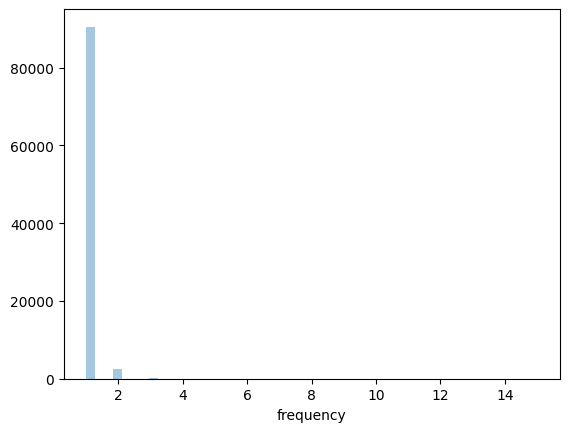

In [99]:
#На графике отчетливо видна разница в количестве покупаемых товаров

sns.distplot(rfm.frequency, kde = False);

Ориентируясь на полученные данные, присвоим пользователям ранги, где 1 - пользователи только лишь с 1 заказом, 4 - пользователи с более, чем 5 заказами. 

In [100]:
def frequency_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x < 2 <= 5:
        return 3
    else:
        return 4
    
rfm['frequency_score'] = rfm.frequency.apply(lambda x: frequency_score(x))

Проведем сегментацию monetary на основании квантилей и присвоим пользователям соответствующие ранги: 1 - пользователи, сделавшие заказ на минимальную сумму, 4 - пользователи с высоким чеком. 

In [101]:
rfm.monetary.describe()

count    93350.000000
mean       141.620235
std        215.702028
min          0.850000
25%         47.650000
50%         89.700000
75%        154.697500
max      13440.000000
Name: monetary, dtype: float64

In [102]:
quantile_monetary = rfm.monetary.quantile(q=[0.25,0.5,0.75]).round(-1)
quantile_monetary

0.25     50.0
0.50     90.0
0.75    150.0
Name: monetary, dtype: float64

In [103]:
def monetary_score(x):
    if x <= quantile_monetary[0.25]:
        return 1
    elif x <= quantile_monetary[0.5]:
        return 2
    elif x <= quantile_monetary[0.75]:
        return 3
    else:
        return 4
    
rfm['monetary_score'] = rfm.monetary.apply(lambda x: monetary_score(x))

In [104]:
rfm['RFM_score'] = rfm.recency_score.astype(str)\
                 + rfm.frequency_score.astype(str)\
                 + rfm.monetary_score.astype(str)

In [105]:
total_rfm = rfm.groupby('RFM_score', as_index = False)\
    .agg({'customer_unique_id':'count'})\
    .rename(columns = {'customer_unique_id': 'customer_count'})\
    .sort_values(by = 'customer_count', ascending = False)

Построим график для визуализации

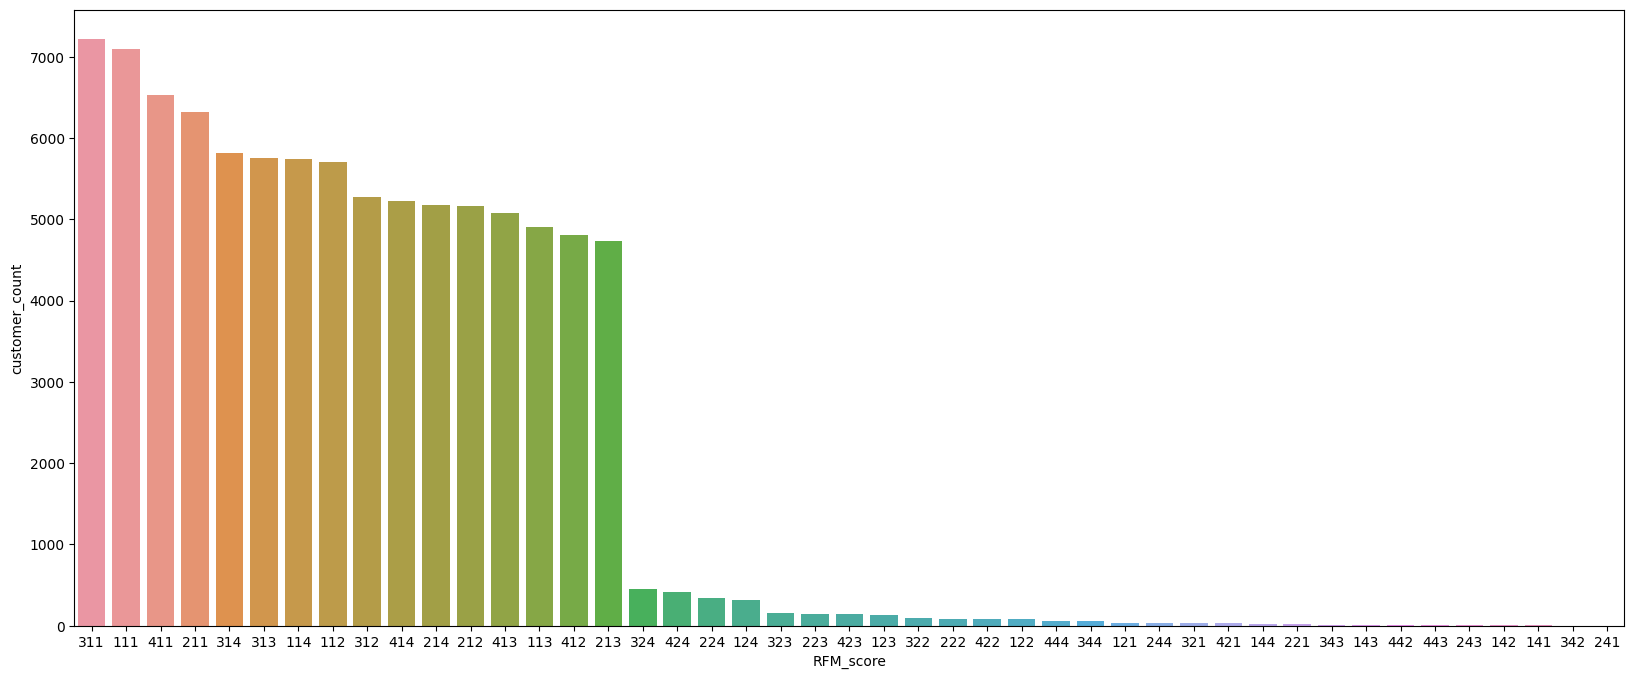

In [106]:
plt.figure(figsize=(20,8))
sns.barplot(data = total_rfm , x='RFM_score', y= 'customer_count'); 

In [107]:
total_rfm['percentage'] = ((total_rfm.customer_count / total_rfm.customer_count.sum() * 100).round(2)).astype(str) + '%'

In [108]:
total_rfm

,RFM_score,customer_count,percentage
23,311,7218,7.73%
0,111,7095,7.6%
34,411,6531,7.0%
12,211,6324,6.77%
26,314,5811,6.22%
25,313,5751,6.16%
3,114,5746,6.16%
1,112,5705,6.11%
24,312,5272,5.65%
37,414,5227,5.6%


В результате получаем слишком большое количество кластеров, такой формат представляется неудобным для дальнейшего анализа. Попробуем объединить клиентов по общей сумме рангов, чтобы посмотреть на общую картину распределения клиентов.

In [109]:
rfm['RFM_total_score'] = rfm.recency_score\
                       + rfm.frequency_score\
                       + rfm.monetary_score

In [110]:
rfm_sum = rfm.groupby('RFM_total_score', as_index = False)\
    .agg({'customer_unique_id':'count'})\
    .rename(columns = {'customer_unique_id': 'customer_count'})\
    .sort_values(by = 'customer_count', ascending = False)

In [111]:
rfm_sum['percentage'] = ((rfm_sum.customer_count / rfm_sum.customer_count.sum() * 100).round(2)).astype(str) + '%'

In [112]:
rfm_sum

,RFM_total_score,customer_count,percentage
3,6,22539,24.14%
2,5,17383,18.62%
4,7,16322,17.48%
1,4,12065,12.92%
5,8,11493,12.31%
0,3,7095,7.6%
6,9,5857,6.27%
7,10,473,0.51%
8,11,62,0.07%
9,12,61,0.07%


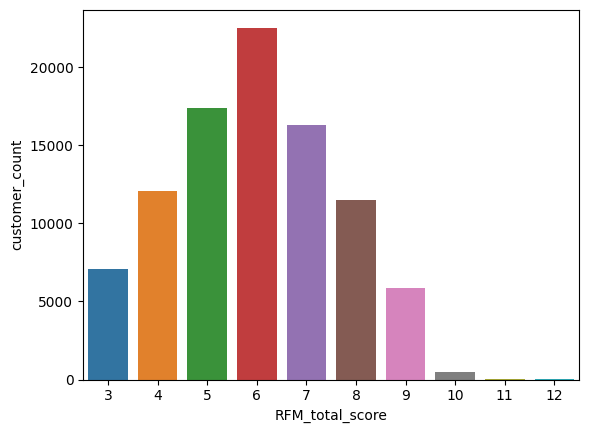

In [113]:
sns.barplot(data = rfm_sum , x='RFM_total_score', y= 'customer_count');

Метрика Recency расчитывалась как разница между последней покупкой клиента и последней датой, представленной в данных. Данные неполные, поэтому за расчет бралась именно дата последней покупки, представленная в таблице, а не текущая дата. Результаты и описание полученных данных показали, что мы можем использовать метод кластеризации по квантилям. В результате пользователи были разбиты на 4 группы, где 1 - это те, кто делал последний заказ очень давно (более 340 дней назад), а 4 - пользователи, вернувшиеся за покупками недавно (менее 110 дней назад).

Метрика Frequency вычислялась как общее количество заказов за весь период. В данном случае описание данных показало, что большая часть наших пользователей совершили всего одну покупку, а значит, кластеризация по квантилям нецелесообразна. Изучив данные немного детальнее, пришла к выводу, что можно разделить пользователей также на 4 группы, где 1 и 2 - пользователи, совершившие одну и две покупки соответственно, 3 - пользователи, сделавшие более 2 и до 5 заказов включительно, и 4 - пользователи, сделавшие заказ более 5 раз. 

Метрика Monetary рассчитывалась как общая сумма заказов за все время. Здесь я также использвоала кластеризацию посредством квантилей. В результате также получилось 4 ранга. 

Все полученные ранги я объединила в общий RFM score как отдельно по кажной метрике, так и в виде суммы рангов. 

В таблице с суммой рангов нас, прежде всего, интересуют клиенты с рангом 10 и выше, так как это клиенты, часто совершающие заказы с большой общей суммой покупок, с момента последнего заказа которых прошло немного времени. Мы видим, что общая доля таких клиентов не составляет и одного процента. 
Для того, чтобы решить, как взаимодействовать с такими клиентами, следует внимательнее ознакомиться с общим рангом и рассмотреть его в разрезе rfm score по кажой метрике - recency. frequency, monetary. Далее, изучить, какие показатели страдают больше всего. Также следует обратить внимание, возможно ли разделить таких клиентов на группы по другим критериям - возможно, по географическому или половому признаку. Все эти данные должны помочь для решения вопроса о грамотном продвижении и увеличении числа лояльных клиентов. 

